# Chi Square

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as mt
import statistics as st
import matplotlib as mpl
from scipy.stats import sem
from math import sqrt 

## The Story

In [2]:
print("You run a small business with four employees: Susan, Jimmy, Albert, and Camilla. Because you need three employees at work at any given time, only one employee ever has the day off. Unfortunately, everyone always wants Saturday off. One of your employees has confronted you and said that you favor some employees over others in providing Saturdays off. To investigate this, you pulled up a list of who has recently had Saturdays off each week.")

You run a small business with four employees: Susan, Jimmy, Albert, and Camilla. Because you need three employees at work at any given time, only one employee ever has the day off. Unfortunately, everyone always wants Saturday off. One of your employees has confronted you and said that you favor some employees over others in providing Saturdays off. To investigate this, you pulled up a list of who has recently had Saturdays off each week.


### Question

In [3]:
print("Do you favor some employees when assigning Saturdays off?")

Do you favor some employees when assigning Saturdays off?


### Answer

In [4]:
#Sample Size

n=1
while (n <= 13 and n > 0) :
    n = int(input ("Enter sample size :\nType a number between 1 and 13\n1.\tn=2\n2.\tn=3\n3.\tn=4\n4.\tn=5\n5.\tn=10\n6.\tn=20\n7.\tn=30\n8.\tn=40\n9.\tn=50\n10.\tn=100\n11.\tn=150\n12.\tn=200\n13.\tn=250\n\n"))
    if n <= 13 and n > 0 :
        if n==1 :
            dt = pd.read_csv('Chi Square n=2.csv',dtype=str, sep = "\t", encoding='latin')
            n=2
            print("Sample Size=",n)
        elif n==2:
            dt = pd.read_csv('Chi Square n=3.csv',dtype=str, sep = "\t", encoding='latin')
            n=3
            print("Sample Size=",n)
        elif n==3:
            dt = pd.read_csv('Chi Square n=4.csv',dtype=str, sep = "\t", encoding='latin')
            n=4
            print("Sample Size=",n)
        elif n==4:
            dt = pd.read_csv('Chi Square n=5.csv',dtype=str, sep = "\t", encoding='latin')
            n=5 
            print("Sample Size=",n)                       
        elif n==5:
            dt = pd.read_csv('Chi Square n=10.csv',dtype=str, sep = "\t", encoding='latin')
            n=10
            print("Sample Size=",n)            
        elif n==6:
            dt = pd.read_csv('Chi Square n=20.csv',dtype=str, sep = "\t", encoding='latin')
            n=20
            print("Sample Size=",n)            
        elif n==7:
            dt = pd.read_csv('Chi Square n=30.csv',dtype=str, sep = "\t", encoding='latin')
            n=30
            print("Sample Size=",n)            
        elif n==8:
            dt = pd.read_csv('Chi Square n=40.csv',dtype=str, sep = "\t", encoding='latin')
            n=40
            print("Sample Size=",n)            
        elif n==9:
            dt = pd.read_csv('Chi Square n=50.csv',dtype=str, sep = "\t", encoding='latin')
            n=50
            print("Sample Size=",n)            
        elif n==10:
            dt = pd.read_csv('Chi Square n=100.csv',dtype=str, sep = "\t", encoding='latin')
            n=100
            print("Sample Size=",n)            
        elif n==11:
            dt = pd.read_csv('Chi Square n=150.csv',dtype=str, sep = "\t", encoding='latin')
            n=150
            print("Sample Size=",n)            
        elif n==12:
            dt = pd.read_csv('Chi Square n=200.csv',dtype=str, sep = "\t", encoding='latin')
            n=200
            print("Sample Size=",n)            
        else:
            dt = pd.read_csv('Chi Square n=250.csv',dtype=str, sep = "\t", encoding='latin')
            n=250
            print("Sample Size=",n)            
        exitn=1
        break
    else :
        n==-1
        print("Wrong Number, re-run the code again and type a number between 1 and 13 and re-run the code again by clicking:\nKernel>Restart\nNo sample size chosen")

print()


#Statistical Significance
alpha=0.05
while (alpha <  1 and alpha > 0) :
    alpha = float(input ("Enter Statistical Significance :\nType a number between 0 and 1, but not 0 nor 1\n"))
    if alpha <  1 and alpha > 0 :
        print("α = ",alpha)
        exita=1
        break
    else :
        alpha==0.05
        print("Wrong Number, \n\nLevel of Statistical Significance\nα = 0.05\n if you want different alpha, re-run the code again and type a number between 0 and 1 by clicking:\nKernel>Restart")
if exitn==1 and exita==1:
    print("Statistical Significance:",alpha)


Enter sample size :
Type a number between 1 and 13
1.	n=2
2.	n=3
3.	n=4
4.	n=5
5.	n=10
6.	n=20
7.	n=30
8.	n=40
9.	n=50
10.	n=100
11.	n=150
12.	n=200
13.	n=250

10
Sample Size= 100

Enter Statistical Significance :
Type a number between 0 and 1, but not 0 nor 1
0.1
α =  0.1
Statistical Significance: 0.1


In [5]:
#Create a function to recode variables
def my_recode(Employee_Name):
    if Employee_Name == "Susan":
        return 1
    elif Employee_Name == "Camilla":
        return 2
    elif Employee_Name == "Albert":
        return 3
    else:
        return 4
dt['Recode'] = dt['Employee Name'].apply(my_recode)


In [6]:
dt

,Employee Name,Recode
0,Camilla,2
1,Susan,1
2,Susan,1
3,Susan,1
4,Susan,1
...,...,...
395,Jimmy,4
396,Susan,1
397,Camilla,2
398,Camilla,2


## Analysis

In [7]:
observed = dt['Employee Name'].value_counts()

In [8]:
d1 = observed[0:1].to_string(index=True)
d2 = observed[1:2].to_string(index=True)
d3 = observed[2:3].to_string(index=True)
d4 = observed[3:4].to_string(index=True)
category1=d1.split(" ", 1)
category2=d2.split(" ", 1)
category3=d3.split(" ", 1)
category4=d4.split(" ", 1)
category1=category1[0]
category2=category2[0]
category3=category3[0]
category4=category4[0]

In [17]:
import tabulate
from tabulate import tabulate

col_names = ["Employee Name", "Observed N", "Expected N", "(O - E)", "(O - E)^2", "((O - E)^2) / E"]

data =  [   
            [category1,observed[0],n,(observed[0]-n),((observed[0]-n)**2),((observed[0]-n)**2)/n], 
            [category2,observed[1],n,(observed[1]-n),((observed[1]-n)**2),((observed[1]-n)**2)/n], 
            [category3,observed[2],n,(observed[2]-n),((observed[2]-n)**2),((observed[2]-n)**2)/n], 
            [category4,observed[3],n,(observed[3]-n),((observed[3]-n)**2),((observed[3]-n)**2)/n]
        ]

print(tabulate(data, col_names))

Employee Name      Observed N    Expected N    (O - E)    (O - E)^2    ((O - E)^2) / E
---------------  ------------  ------------  ---------  -----------  -----------------
Camilla                   240           100        140        19600                196
Jimmy                      80           100        -20          400                  4
Susan                      60           100        -40         1600                 16
Albert                     20           100        -80         6400                 64


## Graphs

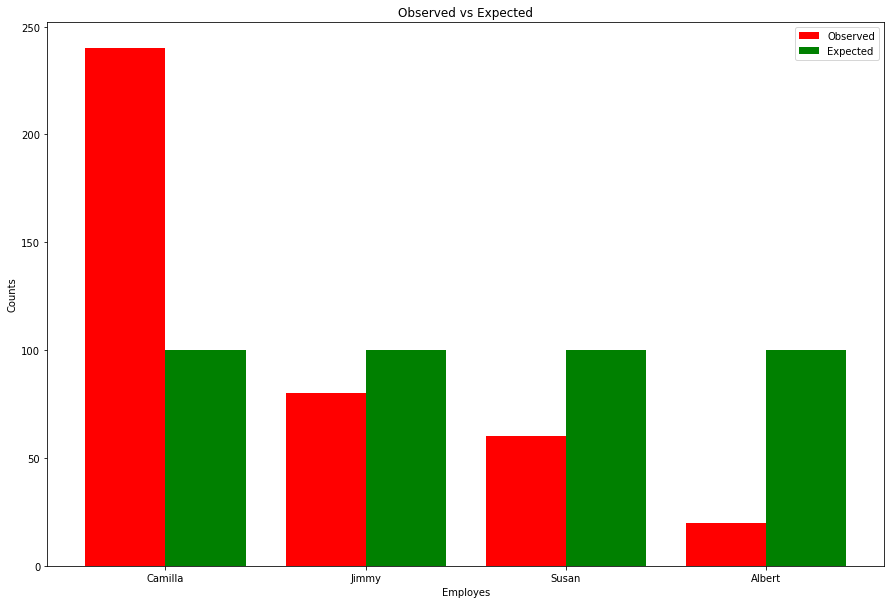

In [10]:
#Bar Chart Observed vs Expected
fig, ax = plt.subplots(figsize=(15,10)) #Setting size of the canvas

X = [category1,category2,category3,category4]
Yobserved = [observed[0],observed[1],observed[2],observed[3]]
Zexpected = [n,n,n,n]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yobserved, 0.4, label = 'Observed',color="r")
plt.bar(X_axis + 0.2, Zexpected, 0.4, label = 'Expected',color="g")
  
plt.xticks(X_axis, X)
plt.xlabel("Employes")
plt.ylabel("Counts")
plt.title("Observed vs Expected")
plt.legend()
plt.show()

### Testing Hypothesis

In [11]:
#perform Chi-Square Goodness of Fit Test

obs = [observed[0],observed[1],observed[2],observed[3]]

#find Chi-Square critical value
stats.chi2.ppf(1-alpha, df=n-1)

chisquaretest=stats.chisquare(f_obs=obs, f_exp=None)
chi2statistic=np.round(chisquaretest[0],3)
sig=np.round(chisquaretest[1],4)

In [12]:
print("Test Hypothesis")
print('===============================================================================================================================')
print("Q: Do you favor some employees when assigning Saturdays off?")
print("H0: There is NO difference between observed and expected frequencies between Employees.\n\t(You do NOT favor some employees when assigning Saturdays off).")
print("H1: There is a difference between observed and expected frequencies between Employees.\n\t(You DO favor some employees when assigning Saturdays off)")
print('===============================================================================================================================')


print("Critical chi-square-statistic = ",np.round(stats.chi2.ppf(1-alpha, df=n-1),3))
print("Observed chi-square-statistic = ",np.round(chi2statistic,3))
print("df =",n-1)
print("p-value =",sig)

Test Hypothesis
Q: Do you favor some employees when assigning Saturdays off?
H0: There is NO difference between observed and expected frequencies between Employees.
	(You do NOT favor some employees when assigning Saturdays off).
H1: There is a difference between observed and expected frequencies between Employees.
	(You DO favor some employees when assigning Saturdays off)
Critical chi-square-statistic =  117.407
Observed chi-square-statistic =  280.0
df = 99
p-value = 0.0


In [13]:
#Cramer's V
minDim = min(dt.shape)-1 #min((c-1,(r-1)))
crv = np.round(sqrt(((chi2statistic/(4*n))/(minDim))),4)

#### Results

In [14]:
print("-----------------------------------------")
print(": Results :")
if(sig < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The chi-squared is statistically significant") 
    print("You DO favor one or more employees when assigning Saturdays off!")
    print("Cramer's V = ",crv)
    print()  
    print("-----------------------------------------")
    print("p-Value =",sig, "<" , alpha , "= α")
    print("-----------------------------------------")
else:
    print("-----------------------------------------")
    print("Retmain the null.") 
    print("The chi-squared is not statistically significant.") 
    print("You do NOT favor one or more employees when assigning Saturdays off!")
    print("Cramer's V = ",crv)
   
    print("-----------------------------------------")
    print("p-Value =",sig, ">" , alpha , "= α")
    print("-----------------------------------------")

-----------------------------------------
: Results :
-----------------------------------------

Reject the null hypothesis
Accept the alternative.
The chi-squared is statistically significant
You DO favor one or more employees when assigning Saturdays off!
Cramer's V =  0.8367

-----------------------------------------
p-Value = 0.0 < 0.1 = α
-----------------------------------------
